In [2]:
#Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for all plots
sns.set_style('whitegrid')

In [3]:
#Data Loading
# Define the data types for each column to save memory
dtype_spec = {
    'step': 'int32',
    'type': 'category',            # Type is categorical [cite: 3]
    'amount': 'float32',           # Amount of the transaction [cite: 3]
    'nameOrig': 'str',             # Customer who started the transaction [cite: 4]
    'oldbalanceOrg': 'float32',    # Initial balance before the transaction [cite: 4]
    'newbalanceOrig': 'float32',   # New balance after the transaction [cite: 4]
    'nameDest': 'str',             # Recipient of the transaction [cite: 4]
    'oldbalanceDest': 'float32',   # Initial balance of recipient [cite: 4]
    'newbalanceDest': 'float32',   # New balance of recipient [cite: 6]
    'isFraud': 'int8',             # Transaction is fraudulent [cite: 7]
    'isFlaggedFraud': 'int8'       # System flagged the transaction [cite: 9]
}

# Loading the dataset 
# Replace 'path/to/your/file.csv' with the actual file path
try:
    df = pd.read_csv('C:\\Users\\Saubhagya\\Desktop\\Fraud detection\\sample dataset\\Fraud.csv', dtype=dtype_spec)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: The file was not found. Please check the file path and try again.")

# Display the first 5 rows to verify
print("First 5 rows of the dataset:")
display(df.head())

# Check the memory usage and data types
print("\nDataset Info:")
df.info()

Dataset loaded successfully!
First 5 rows of the dataset:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.639648,C1231006815,170136.0,160296.359375,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.280029,C1666544295,21249.0,19384.720703,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.000000,C1305486145,181.0,0.000000,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.000000,C840083671,181.0,0.000000,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.139648,C2048537720,41554.0,29885.859375,M1230701703,0.0,0.0,0,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype   
---  ------          -----   
 0   step            int32   
 1   type            category
 2   amount          float32 
 3   nameOrig        object  
 4   oldbalanceOrg   float32 
 5   newbalanceOrig  float32 
 6   nameDest        object  
 7   oldbalanceDest  float32 
 8   newbalanceDest  float32 
 9   isFraud         int8    
 10  isFlaggedFraud  int8    
dtypes: category(1), float32(5), int32(1), int8(2), object(2)
memory usage: 260.9+ MB


In [4]:
# Exploratory Data Analysis (EDA) & Cleaning
print("Statistical summary of numerical features:")
display(df.describe())

Statistical summary of numerical features:


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338834e+05,8.551137e+05,1.100702e+06,1.224997e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924048e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
# Check for any missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

if missing_values.sum() == 0:
    print("\nGreat! There are no missing values in the dataset.")
else:
    print("\nThere are missing values that need to be handled.")

Missing values per column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Great! There are no missing values in the dataset.


Fraudulent Transaction Distribution:
isFraud
0    6354407
1       8213
Name: count, dtype: int64

Percentage of Legitimate Transactions (0): 99.8709%
Percentage of Fraudulent Transactions (1): 0.1291%


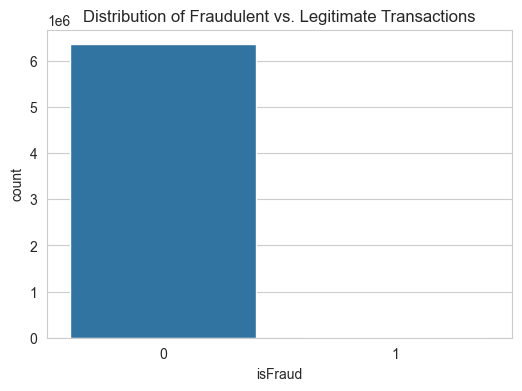

In [6]:
# Check the distribution of the target variable 'isFraud'
fraud_counts = df['isFraud'].value_counts()
fraud_percentage = df['isFraud'].value_counts(normalize=True) * 100

print("Fraudulent Transaction Distribution:")
print(fraud_counts)
print(f"\nPercentage of Legitimate Transactions (0): {fraud_percentage[0]:.4f}%")
print(f"Percentage of Fraudulent Transactions (1): {fraud_percentage[1]:.4f}%")

# Visualize the imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=df)
plt.title('Distribution of Fraudulent vs. Legitimate Transactions')
plt.show()

In [7]:
# Analyzing the relationship between transaction type and fraud
type_fraud_crosstab = pd.crosstab(df['type'], df['isFraud'])
print("Transaction Types vs. Fraud:")
display(type_fraud_crosstab)

Transaction Types vs. Fraud:


isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


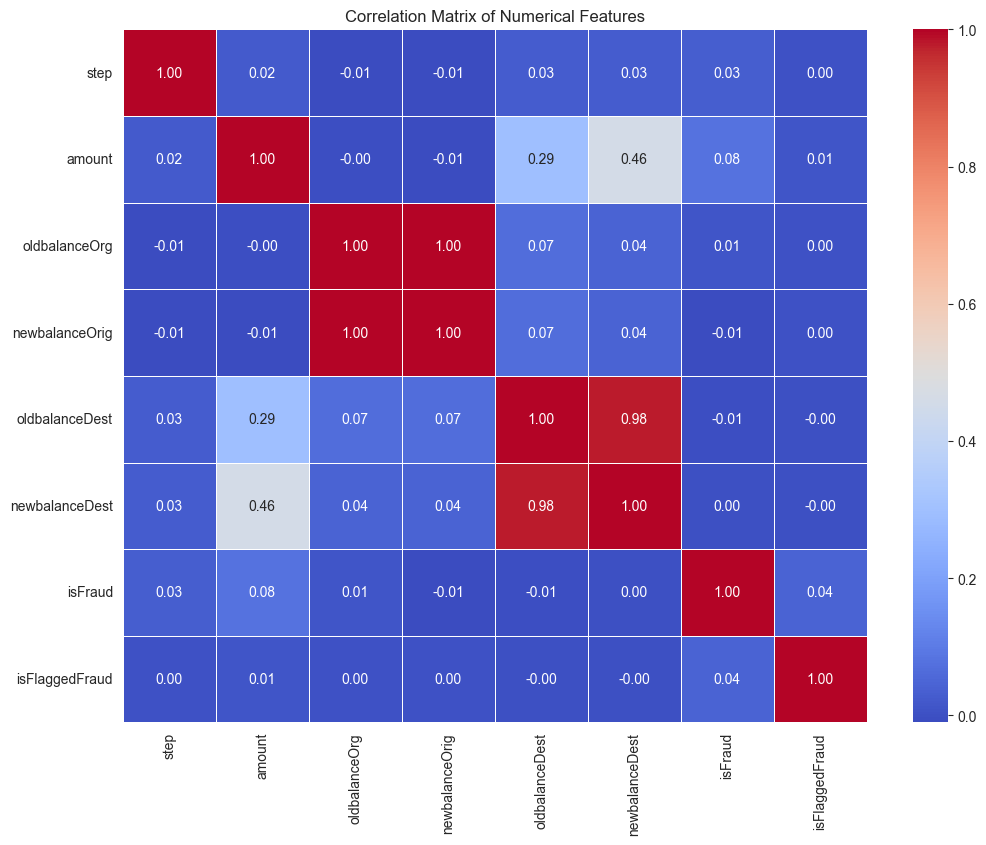

In [8]:
# Select only numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

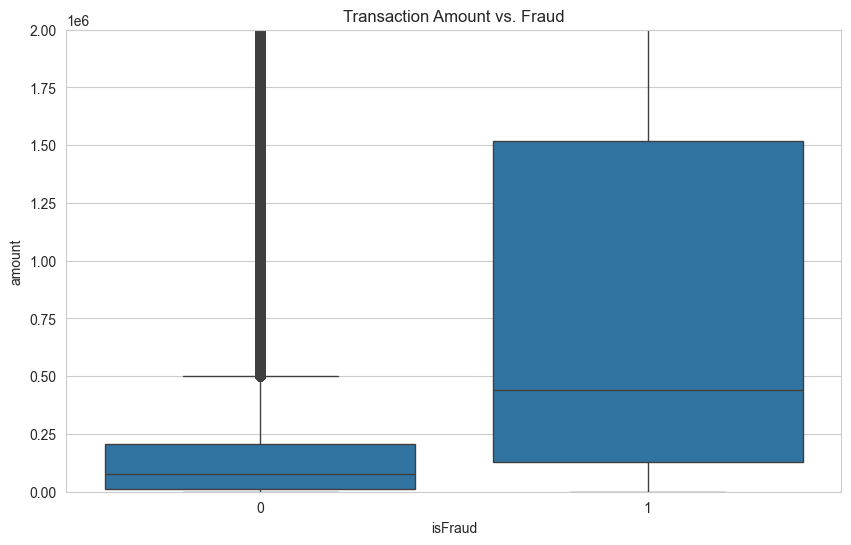

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Transaction Amount vs. Fraud')
plt.ylim(0, 2000000) # Limit y-axis for better readability, as max values are extreme
plt.show()

In [10]:
# Creating features to capture discrepancies in account balances
df['balance_error_orig'] = df['oldbalanceOrg'] - df['amount'] - df['newbalanceOrig']
df['balance_error_dest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']

# Creating a feature to flag attempts to empty an account
# We use a small epsilon for floating point comparison
epsilon = 1e-6 
df['emptied_account'] = (df['oldbalanceOrg'] - df['amount'] < epsilon).astype(int)

print("Newly created features:")
display(df[['balance_error_orig', 'balance_error_dest', 'emptied_account']].describe())

Newly created features:


,balance_error_orig,balance_error_dest,emptied_account
count,6.362620e+06,6.362620e+06,6.362620e+06
mean,-2.010926e+05,5.556721e+04,6.423634e-01
std,6.066504e+05,4.415288e+05,4.793044e-01
min,-9.244552e+07,-7.588572e+07,0.000000e+00
25%,-2.496411e+05,0.000000e+00,0.000000e+00
50%,-6.867725e+04,3.500490e+03,1.000000e+00
75%,-2.954197e+03,2.935302e+04,1.000000e+00
max,4.000000e+00,1.319123e+07,1.000000e+00


In [11]:
# Converting the 'type' column into numerical format using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)

print("Dataset shape before encoding:", df.shape)
print("Dataset shape after encoding:", df_encoded.shape)

print("\nFirst 5 rows of the encoded dataframe:")
display(df_encoded.head())

Dataset shape before encoding: (6362620, 14)
Dataset shape after encoding: (6362620, 17)

First 5 rows of the encoded dataframe:


,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_error_orig,balance_error_dest,emptied_account,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.639648,C1231006815,170136.0,160296.359375,M1979787155,0.0,0.0,0,0,0.0,9839.639648,0,False,False,True,False
1,1,1864.280029,C1666544295,21249.0,19384.720703,M2044282225,0.0,0.0,0,0,0.0,1864.280029,0,False,False,True,False
2,1,181.000000,C1305486145,181.0,0.000000,C553264065,0.0,0.0,1,0,0.0,181.000000,1,False,False,False,True
3,1,181.000000,C840083671,181.0,0.000000,C38997010,21182.0,0.0,1,0,0.0,21363.000000,1,True,False,False,False
4,1,11668.139648,C2048537720,41554.0,29885.859375,M1230701703,0.0,0.0,0,0,0.0,11668.139648,0,False,False,True,False


In [12]:
# Drop the original 'type' column (if not already dropped by get_dummies) 
# and the identifier columns
model_df = df_encoded.drop(['nameOrig', 'nameDest'], axis=1)

print("Final columns for the model:")
print(model_df.columns)

Final columns for the model:
Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'balance_error_orig',
       'balance_error_dest', 'emptied_account', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')


In [13]:
from sklearn.model_selection import train_test_split

# Define our features (X) and target (y)
X = model_df.drop('isFraud', axis=1)
y = model_df['isFraud']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (5090096, 14)
Shape of X_test: (1272524, 14)


In [14]:
from imblearn.over_sampling import SMOTE
# Handling Severe Class Imbalance with SMOTE (Synthetic Minority Over-sampling Technique)
print("Before SMOTE, counts of label '1': {}".format(sum(y_train == 1)))
print("Before SMOTE, counts of label '0': {}".format(sum(y_train == 0)))

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("\nAfter SMOTE, the shape of X_train_res: {}".format(X_train_res.shape))
print("After SMOTE, the shape of y_train_res: {}".format(y_train_res.shape))

print("\nAfter SMOTE, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_res == 0)))

Before SMOTE, counts of label '1': 6570
Before SMOTE, counts of label '0': 5083526

After SMOTE, the shape of X_train_res: (10167052, 14)
After SMOTE, the shape of y_train_res: (10167052,)

After SMOTE, counts of label '1': 5083526
After SMOTE, counts of label '0': 5083526


In [15]:
## 1. Robust Validation with Stratified K-Fold Cross-Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import xgboost as xgb

# Use the original, imbalanced X and y data for a realistic validation
X = model_df.drop('isFraud', axis=1)
y = model_df['isFraud']

# Initialize the XGBoost model with default parameters
model_for_cv = xgb.XGBClassifier(random_state=42)

# Set up the Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Run cross-validation (this can take some time)
print("Running Stratified K-Fold Cross-Validation...")
scores = cross_val_score(model_for_cv, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
print("Cross-Validation complete!")

# Print the results
print(f"\nAUC-ROC scores for each fold: {scores}")
print(f"Average AUC-ROC score: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

Running Stratified K-Fold Cross-Validation...
Cross-Validation complete!

AUC-ROC scores for each fold: [0.99862046 0.99646684 0.99977117 0.99978779 0.99873801]
Average AUC-ROC score: 0.9987
Standard Deviation: 0.0012


In [ ]:
## 2. Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# We use the balanced training data (X_train_res, y_train_res) for tuning
# This was created in your SMOTE step
# Rationale: Tuning on a large dataset (10M+ rows after SMOTE) is computationally expensive.
# A stratified sample is sufficient to find optimal hyperparameters while saving time and memory.
# Define a focused grid of parameters to test
# GridSearchCV exhaustively tests a pre-defined grid of parameters to find the best combination for the model.
param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}

# Initialize the Grid Search
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=1 # n_jobs=-1 use this to use all available CPU cores to speed up the tuning process depending on your hardware.

)

# Fit the grid search to the data (this is time-consuming)
print("Starting hyperparameter tuning...")
grid_search.fit(X_train_res, y_train_res)
print("Tuning complete!")

# Get the best model from the search
best_model = grid_search.best_estimator_

# Print the best parameters found
print(f"\nBest parameters found: {grid_search.best_params_}")
print(f"Best AUC-ROC score during tuning: {grid_search.best_score_:.4f}")

Starting hyperparameter tuning...
Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:06:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=  25.0s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:06:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=  23.2s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:07:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=  23.8s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:07:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=  19.0s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:07:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=  18.9s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:08:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=  19.2s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:08:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=  42.6s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:09:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=  43.4s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:10:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=  43.9s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:10:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=  35.0s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:11:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=  35.7s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:11:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=  34.4s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:12:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=  26.7s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:13:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=  26.4s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:13:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=  26.2s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:13:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=  23.2s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:14:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=  22.5s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:14:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=  22.5s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:15:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=  55.1s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:15:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=15.3min


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:31:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time= 1.2min


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time= 1.1min


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:33:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=  58.6s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:34:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=  57.3s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:35:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=  27.9s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:35:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=  26.7s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:36:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=  26.2s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:36:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=  22.4s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:37:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=  21.7s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:37:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=  21.2s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:37:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=  42.4s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:38:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=  44.4s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:39:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=  42.9s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:40:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=  40.6s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:40:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=  33.0s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:41:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=  32.3s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:41:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=  25.2s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:42:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=  25.7s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:42:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=  24.7s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:43:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=  21.0s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:43:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=  21.6s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:43:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=  20.8s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:44:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=  47.1s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:45:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=  47.2s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:45:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=  51.9s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:46:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=  37.7s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:47:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=  35.6s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:47:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=  37.7s


c:\Users\Saubhagya\Desktop\Fraud detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:48:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Tuning complete!

Best parameters found: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best AUC-ROC score during tuning: 1.0000


In [17]:
## 3. Evaluate the Tuned Model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions using the best model found by GridSearchCV
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("Evaluation of the TUNED model:")

Evaluation of the TUNED model:



Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00   1270881
       Fraud       0.87      1.00      0.93      1643

    accuracy                           1.00   1272524
   macro avg       0.93      1.00      0.96   1272524
weighted avg       1.00      1.00      1.00   1272524

Final AUC-ROC Score on Test Data: 0.9997


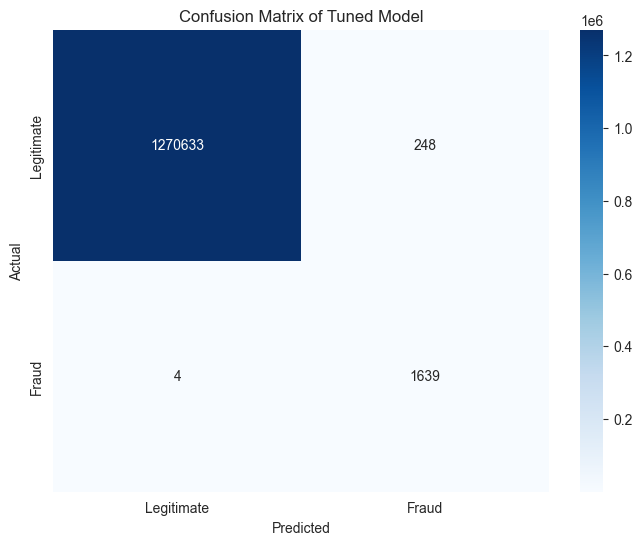

In [18]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Fraud']))

# AUC-ROC Score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"Final AUC-ROC Score on Test Data: {auc_score:.4f}")


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Tuned Model')
plt.show()

SHAP Summary Bar Plot:


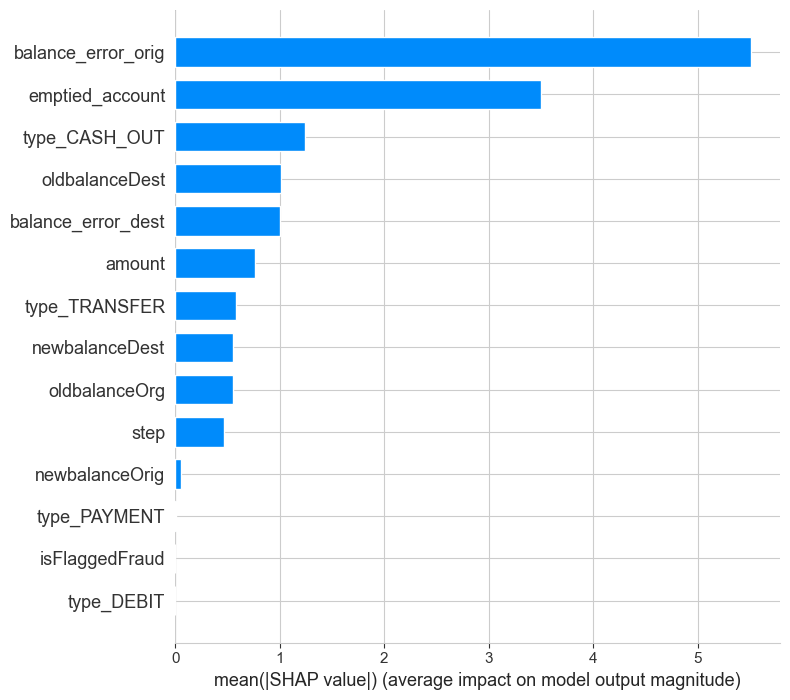

In [ ]:
## 4. Model Explainability with SHAP
# SHAP (SHapley Additive exPlanations) is used to explain the predictions of the machine learning model.
# It provides transparency into why the model makes certain decisions, which is critical for a fraud detection system.

import shap

# Create an explainer object for our tuned model
explainer = shap.TreeExplainer(best_model)

# The SHAP summary plot ranks features by their overall importance and shows their impact direction.
# This helps understand which factors are the biggest drivers of fraud predictions across many transactions.

# Calculate SHAP values for a sample of the test data for speed
# Using a sample of 1000-5000 is usually sufficient
X_test_sample = X_test.sample(n=2000, random_state=42)
shap_values = explainer.shap_values(X_test_sample)

# The SHAP summary plot ranks features by their overall importance and shows their impact direction.
# This helps understand which factors are the biggest drivers of fraud predictions across many transactions.
print("SHAP Summary Bar Plot:")
shap.summary_plot(shap_values, X_test_sample, plot_type="bar")

In [ ]:
# The force plot provides a detailed explanation for a single prediction.
# It shows which features "pushed" the model's output towards a specific outcome (e.g., "Fraud").
# This is invaluable for analysts reviewing individual flagged transactions.
fraud_index = np.where(y_test == 1)[0][0] # Find the first fraud case
X_test_fraud_case = X_test.iloc[[fraud_index]]

# Calculate SHAP values for this single case
shap_values_single = explainer.shap_values(X_test_fraud_case)

# Initialize javascript for plotting
shap.initjs()

# Create the force plot
print(f"\nSHAP Force Plot for Fraudulent Transaction at index {fraud_index}:")
shap.force_plot(explainer.expected_value, shap_values_single, X_test_fraud_case)


SHAP Force Plot for Fraudulent Transaction at index 367:
